Dataset Link - https://www.kaggle.com/datasets/mfaisalqureshi/spam-email

In [80]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [81]:
# read dataset
spam_df = pd.read_csv("/content/spam.csv")
spam_df.head(2)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [82]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [84]:
print(spam_df["Category"].value_counts())
#replace categorical values to numerical value
spam_df["Category"] = spam_df["Category"].replace({"spam":1, "ham":0})
spam_df["Category"].value_counts()

Category
0    4825
1     747
Name: count, dtype: int64


,count
Category,
0,4825
1,747


In [86]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(spam_df["Message"], spam_df["Category"], test_size=0.2)

# define the pipeline
clf = Pipeline(
    [("vectorizer", CountVectorizer()),
     ("Logistic", LogisticRegression())]
)

# fit the pipeline with dataset
clf.fit(X_train, y_train)

# predict use test data
y_predict = clf.predict(X_test)

In [89]:
accuracy = accuracy_score(y_test, y_predict)
print("Accuracy - ", accuracy)
print(classification_report(y_test, y_predict))

# confusion matrix
cm = confusion_matrix(y_test, y_predict)

Accuracy -  0.9883408071748879
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       969
           1       1.00      0.91      0.95       146

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



<Axes: >

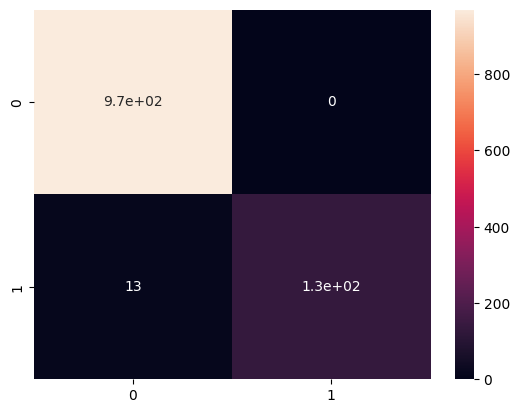

In [91]:
sns.heatmap(cm, annot=True)

In [92]:
for sample in spam_df[:5].values:
  print(f"actual - {sample[0]}, predicted -{ clf.predict([sample[1]]) }")

actual - 0, predicted -[0]
actual - 0, predicted -[0]
actual - 1, predicted -[1]
actual - 0, predicted -[0]
actual - 0, predicted -[0]
